Case Study Number 2
Data 1D
NIM 2602105632 (Even)

LINK VIDEO PRESENTASI :
https://drive.google.com/file/d/1iPI10z60tBJYjNJnGqPVuv1Fxs6GiBBn/view?usp=sharing

In [ ]:
pip install gensim

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import os

from google.colab import drive

from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
#a. Preprocessing
#inisialisasi NLTK dan Gensim

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Mengakses google drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Membaca dan mengekstract head atau urutan 5 teratas data

file_id = '1lGm3tdx0DdveDlHFz80u5pfvYdgHrQaV'
url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,text,label
0,0,Tamron AF 70-300mm F/4.0-5.6 Di LD Macro Telep...,Electronics
1,1,Softline Butterfly Women's Cotton Camisole,Clothing & Accessories
2,2,Indian Economy: For UPSC Civil Services & Othe...,Books
3,3,Fujifilm X-T3 Mirrorless Digital Camera with X...,Electronics
4,4,"Barata Formal Ties For Men, Navy Blue Tie Form...",Clothing & Accessories


In [ ]:
# Preprocessing (cleansing, tokenization, remove stop words dan lemmatization dengan gensim)

def preprocess_text(text):

    #Cleansing
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    #Tokenization
    tokens = simple_preprocess(text)

    #Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [ ]:
#Mengaplikasikan fungsi ke data

data['processed_text'] = data['text'].apply(preprocess_text)
data[['text', 'processed_text']].head()

,text,processed_text
0,Tamron AF 70-300mm F/4.0-5.6 Di LD Macro Telep...,tamron af mm di ld macro telephoto zoom lens n...
1,Softline Butterfly Women's Cotton Camisole,softline butterfly woman cotton camisole
2,Indian Economy: For UPSC Civil Services & Othe...,indian economy upsc civil service state psc ex...
3,Fujifilm X-T3 Mirrorless Digital Camera with X...,fujifilm xt mirrorless digital camera xf mm lm...
4,"Barata Formal Ties For Men, Navy Blue Tie Form...",barata formal tie men navy blue tie formal bro...


In [ ]:
# b. Classification Modeling, Vectorization, Tuning Hyperparameter

#Membagi dataset menjadi x dan y
X = data['processed_text']
y = data['label']

In [ ]:
#Membagi dataset menjadi train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi Count Vectorizer dan TF-IDF Vectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transformasi teks menggunakan Count Vectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Transformasi teks menggunakan TF-IDF Vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

SVM WITH COUNT VECTORIZATION

In [ ]:
svm_model = SVC()

In [ ]:
#Tuning hyperparameter SVM

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf']
}

In [ ]:
y_train = y_train.ravel()

In [ ]:
#SVM Grid Search (Count Vectorization)

svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_train_count, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [ ]:
svm_count_model = svm_grid.best_estimator_
svm_count_model.fit(X_train_count, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
# Prediksi pada data uji dengan CountVectorizer

y_pred_count = svm_count_model.predict(X_test_count)

In [ ]:
# Evaluasi SVM dengan Count Vectorization

print("SVM dengan Count Vectorization:")
print(classification_report(y_test_encoded, y_pred_count))

SVM dengan Count Vectorization:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       583
           1       0.96      0.96      0.96       433
           2       0.94      0.93      0.94       547
           3       0.95      0.95      0.95       959

    accuracy                           0.95      2522
   macro avg       0.95      0.95      0.95      2522
weighted avg       0.95      0.95      0.95      2522



RANDOM FOREST WITH COUNT VECTORIZATION

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
# Tuning hyperparameter Random Forest

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}

In [ ]:
#Random Forest Grid Search (Count Vectorization)

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train_count, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200, 300]})

In [ ]:
rf_best = rf_grid.best_estimator_
rf_best.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred_rf_count = rf_best.predict(X_test_count)

In [ ]:
# Evaluasi Random Forest dengan Count Vectorization

print("Random Forest dengan Count Vectorization:")
print(classification_report(y_test_encoded, y_pred_rf_count))

Random Forest dengan Count Vectorization:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       583
           1       0.97      0.96      0.96       433
           2       0.96      0.88      0.92       547
           3       0.91      0.96      0.94       959

    accuracy                           0.94      2522
   macro avg       0.95      0.94      0.94      2522
weighted avg       0.94      0.94      0.94      2522



SVM WITH TF-IDF VECTORIZATION

In [ ]:
# Melatih model SVM dengan TF-IDF Vectorization
svm_tfidf_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_tfidf_grid.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [ ]:
# Melakukan prediksi dengan SVM menggunakan TF-IDF

svm_tfidf_model = svm_tfidf_grid.best_estimator_
svm_tfidf_model.fit(X_train_count, y_train)

SVC(C=1, kernel='linear')

In [ ]:
y_pred_tfidf = svm_tfidf_model.predict(X_test_tfidf)

In [ ]:
# Menampilkan hasil evaluasi model SVM dengan TF-IDF Vectorization

print("\nSVM dengan TF-IDF Vectorization:")
print(classification_report(y_test, y_pred_tfidf))


SVM dengan TF-IDF Vectorization:
              precision    recall  f1-score   support

           0       0.24      1.00      0.39       583
           1       1.00      0.09      0.16       433
           2       1.00      0.02      0.04       547
           3       1.00      0.05      0.10       959

    accuracy                           0.27      2522
   macro avg       0.81      0.29      0.17      2522
weighted avg       0.82      0.27      0.16      2522



RANDOM FOREST WITH TF-IDF VECTORIZATION

In [ ]:
# Melatih model Random Forest dengan TF-IDF Vectorization
rf_tfidf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_tfidf_grid.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Melakukan prediksi dengan Random Forest menggunakan TF-IDF

rf_tfidf_best = rf_tfidf_grid.best_estimator_
rf_tfidf_best.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred_rf_tfidf = rf_tfidf_best.predict(X_test_tfidf)

In [ ]:
# Menampilkan hasil evaluasi model Random Forest dengan TF-IDF Vectorization

print("\nRandom Forest dengan TF-IDF Vectorization:")
print(classification_report(y_test, y_pred_rf_tfidf))


Random Forest dengan TF-IDF Vectorization:
              precision    recall  f1-score   support

           0       0.23      1.00      0.38       583
           1       1.00      0.03      0.05       433
           2       1.00      0.01      0.01       547
           3       1.00      0.01      0.02       959

    accuracy                           0.24      2522
   macro avg       0.81      0.26      0.11      2522
weighted avg       0.82      0.24      0.10      2522



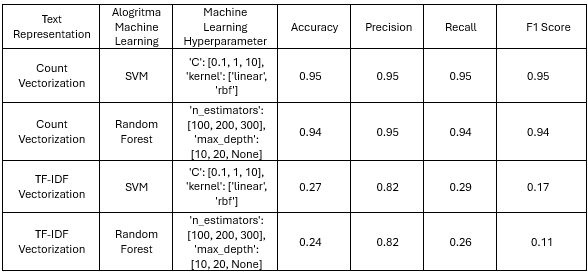

Dari hasil analisis, dapat dilihat bahwa SVM dengan count vectorization memiliki kinerja paling tinggi, sedangkan Random Forest dengan TF-IDF memiliki kinerja paling rendah. Dapat disimpulkan bahwa Count Vectorization lebih efektif dibandingkan TF-IDF Vectorization untuk dataset ini. Sementara dalam hal algoritma, SVM menghasilkan performa lebih baik daripada Random Forest ketika dipadukan dengan Count Vectorization.